In [182]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import symbols, integrate, oo, cos
from scipy.integrate import quad
import scipy.special as sc

In [183]:
# 單位 wavelength & velocity_g & x-vt
x_width = 100
o_width = 100
t1 = 10**(-9) # 1ns
t2 = 5*(10**(-9)) # 1ns
velocity_g = 3*(10**8) # m/s
wavelength = 0.06 # m
wavelength_a = -0.1*wavelength
wavelength_b = -1.1*wavelength
x = np.linspace(wavelength_a, wavelength_b, x_width)
Omega = 2*math.pi*5 # GHz
Omega_a = 0.95*Omega
Omega_b = 1.05*Omega
omega_s = np.linspace(Omega_a, Omega_b, o_width)                    #photon frequency
Gamma = 2*math.pi*0.01  # GHz
tilde_Omega = Omega - 1j*Gamma/2

In [184]:
# 初始化一个用于存储结果的二维数组
Reflection_o_x_t1 = np.array([[0+0j]*len(x)]*len(omega_s))
Reflection_o_x_t2 = np.array([[0+0j]*len(x)]*len(omega_s))
R1 = np.array([[0+0j]*len(x)]*len(omega_s))
R2 = np.array([[0+0j]*len(x)]*len(omega_s))
R3 = np.array([[0+0j]*len(x)]*len(omega_s))

In [185]:
# ci
def integrand(z, x, y):
    return np.cos(z * y) / z

def ci(x, y):
    result, _ = quad(integrand, x, np.inf, args=(x, y))
    return -result

In [186]:
# si
def integrand(z, x, y):
    return np.sin(z * y) / z

def si(x, y):
    result, _ = quad(integrand, x, np.inf, args=(x, y))
    return -result

$ 
R(\omega_s,x,t)=R(\omega_s)e^{-i\frac{\omega_s}{v_g}(x+v_gt)}$  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
$+\frac {iR(\omega_s)}{2\pi } e^{-i\frac{\Omega}{v_g}(x+v_gt)}e^{-\frac{\Gamma/2}{v_g}(x+v_gt)} [E_1(i\frac {|x|}{v_g}\tilde \Omega)+2\pi i-E_1(-i\frac{x+v_gt}{v_g}\tilde\Omega)]$  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
$+\frac{R(\omega_s)}{2\pi}$ $e^{-i\frac {\omega_s}{v_g}(x+v_gt)}[ici(\omega_{s}\frac{|x|}{v_g})+si(\omega_s\frac{|x|}{v_g})-ici(\omega_s\frac{x+v_gt}{v_g})+si(\omega_s\frac{x+v_gt}{v_g})]$

In [187]:
 ## directly compute with ci,si
for i in range(len(x)):
    for k in range(len(omega_s)):
        Transmission_omega_s = (omega_s[k]-Omega)/(omega_s[k]-Omega+1j*Gamma/2)
        Reflection_omega_s = -1j*(Gamma/2)/(omega_s[k]-Omega+1j*Gamma/2)
        EX = x[i]+velocity_g*t1
        
        E1a = 1j*abs(x[i])/velocity_g*tilde_Omega
        E1b = -1j*EX/velocity_g*tilde_Omega 
        
        R1[i][k] = Reflection_omega_s*math.e**(-1j*(omega_s[k]/velocity_g)*EX)
        R2[i][k] = 1j*Reflection_omega_s/(2*math.pi)*math.e**(-1j*Omega/velocity_g*EX)*math.e**(-Gamma/2/velocity_g*EX)*((sc.exp1(complex(np.real(E1a), np.imag(E1a)))) + 2*math.pi*1j - sc.exp1(complex(np.real(E1b), np.imag(E1b))))
        R3[i][k] = Reflection_omega_s/2/math.pi*math.e**(-1j*omega_s[k]/velocity_g*EX)*(1j*ci(omega_s[k],-x[i]/velocity_g)+si(omega_s[k],-x[i]/velocity_g)-1j*ci(omega_s[k],EX/velocity_g)+si(omega_s[k],EX/velocity_g))
        Reflection_o_x_t1[i][k] = R1[i][k] + R2[i][k] + R3[i][k]

        if x[i] >= 0 :
            print('x>=0')
            print('x=',x)
            print('i=',i,'k=',k)
            break
            break
        if EX <= 0 :
            print('x+velocity_g*t1 <= 0')
            print(velocity_g*t1)
            print('i=',i,'k=',k)
            break
            break
        

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  


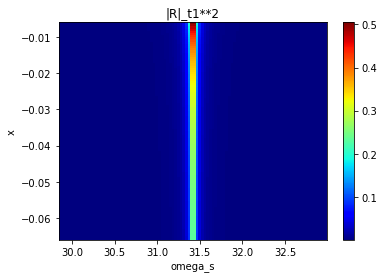

In [188]:
plt.imshow(abs(Reflection_o_x_t1)**2,cmap='jet', origin='upper', extent=[Omega_a, Omega_b, wavelength_b, wavelength_a], aspect='auto')
plt.colorbar()
plt.title('|R|_t1**2')
plt.xlabel('omega_s')
plt.ylabel('x')
plt.show()

$ 
R(\omega_s,x,t)=R(\omega_s)e^{-i\frac{\omega_s}{v_g}(x+v_gt)}$  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
$+\frac {iR(\omega_s)}{2\pi } e^{-i\frac{\Omega}{v_g}(x+v_gt)}e^{-\frac{\Gamma/2}{v_g}(x+v_gt)} [E_1(i\frac {|x|}{v_g}\tilde \Omega)+2\pi i-E_1(-i\frac{x+v_gt}{v_g}\tilde\Omega)]$  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
$+\frac{R(\omega_s)}{2\pi}$ $e^{-i\frac {\omega_s}{v_g}(x+v_gt)}[ici(\omega_{s}\frac{|x|}{v_g})+si(\omega_s\frac{|x|}{v_g})-ici(\omega_s\frac{x+v_gt}{v_g})+si(\omega_s\frac{x+v_gt}{v_g})]$

In [189]:
# directly compute with ci,si
# t2
for i in range(len(x)):
    for k in range(len(omega_s)):
        Transmission_omega_s = (omega_s[k]-Omega)/(omega_s[k]-Omega+1j*Gamma/2)
        Reflection_omega_s = -1j*(Gamma/2)/(omega_s[k]-Omega+1j*Gamma/2)
        EX = x[i]+velocity_g*t2
        
        E1a = 1j*abs(x[i])/velocity_g*tilde_Omega
        E1b = -1j*EX/velocity_g*tilde_Omega 
        
        R1[i][k] = Reflection_omega_s*math.e**(-1j*(omega_s[k]/velocity_g)*EX)
        R2[i][k] = 1j*Reflection_omega_s/(2*math.pi)*math.e**(-1j*Omega/velocity_g*EX)*math.e**(-Gamma/2/velocity_g*EX)*((sc.exp1(complex(np.real(E1a), np.imag(E1a)))) + 2*math.pi*1j - sc.exp1(complex(np.real(E1b), np.imag(E1b))))
        R3[i][k] = Reflection_omega_s/2/math.pi*math.e**(-1j*omega_s[k]/velocity_g*EX)*(1j*ci(omega_s[k],-x[i]/velocity_g)+si(omega_s[k],-x[i]/velocity_g)-1j*ci(omega_s[k],EX/velocity_g)+si(omega_s[k],EX/velocity_g))
        Reflection_o_x_t2[i][k] = R1[i][k] + R2[i][k] + R3[i][k]

        if x[i] >= 0 :
            print('x>=0')
            print('x=',x)
            print('i=',i,'k=',k)
            break
            break
        if EX <= 0 :
            print('x+velocity_g*t2 <= 0')
            print(velocity_g*t2)
            print('i=',i,'k=',k)
            break
            break
        

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  


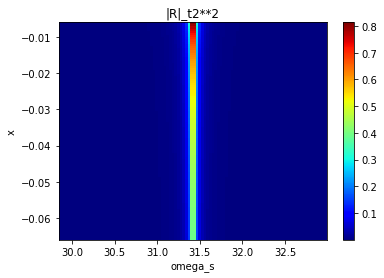

In [190]:
plt.imshow(abs(Reflection_o_x_t2)**2,cmap='jet', origin='upper', extent=[Omega_a, Omega_b, wavelength_b, wavelength_a], aspect='auto')
plt.colorbar()
plt.title('|R|_t2**2')
plt.xlabel('omega_s')
plt.ylabel('x')
plt.show()